In [717]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [718]:
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',100)
plt.style.use('dark_background')

# 1 READ FILE

In [719]:
games = pd.read_csv('video-game-sales.csv')
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# 2 File Size

In [720]:
print(games.shape)

(16598, 11)


In [721]:
len(games.Name.unique())

11493

# 3 Checking Missing Values

In [722]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
               ... 
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Length: 11, dtype: int64

# DATASETS Will have 11 Coloums as:
Rank - Ranking od thr sales, integer

Name - The games name, object

Platform - Platform of the games release (i.e. PS4,XBOX,PC etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales


# Genre 

In [723]:
games['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
                ... 
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, Length: 12, dtype: int64

# Most Commonly Launched Games According to Respective Genre💸↗

Genre


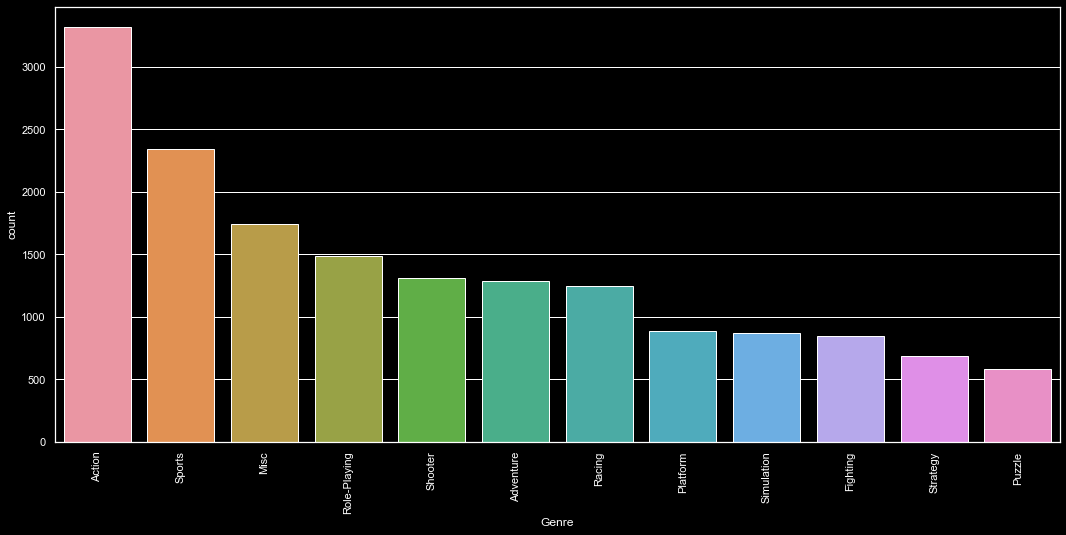

In [749]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Genre", data=games, order = games['Genre'].value_counts().index)
plt.xticks(rotation=90)
print('Genre')

# Most Trusted Gaming Platform

In [724]:
print(games['Platform'].value_counts().head(5))
print(games['Platform'].nunique())


DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
31


C:\Users\Paul.Ronen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


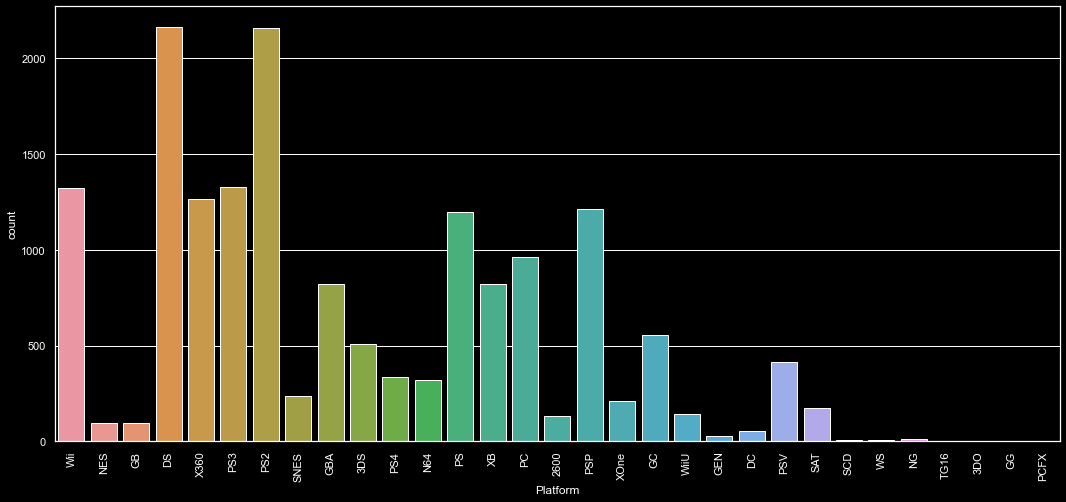

Platform


In [725]:
plt.figure(figsize=(18,8))
sns.countplot(games['Platform'])
plt.xticks(rotation=90)
plt.show()
print('Platform')

# Total Publisher

In [726]:
print(games['Publisher'].value_counts().head(5))
print(games['Publisher'].nunique())


Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64
578


# Top 5 Publisher 

In [727]:
games.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:]

Publisher
UEP Systems            2.250000
Arena Entertainment    2.360000
Nintendo               2.541337
Red Orb                2.620000
Palcom                 4.170000
Name: Global_Sales, dtype: float64

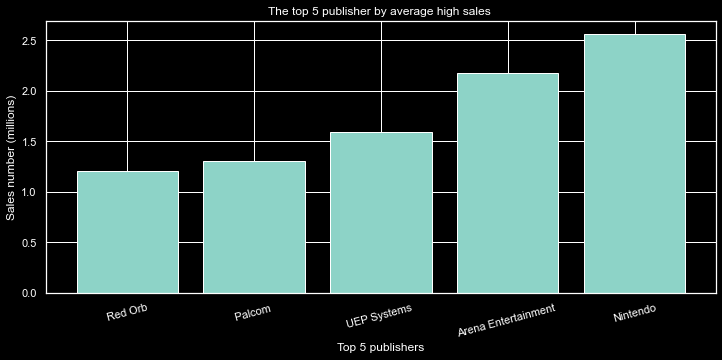

In [728]:
plt.figure(figsize=(12,5))
plt.bar([1, 2, 3,4,5], [1.205, 1.30042328, 1.592 , 2.1725, 2.56354885], tick_label=['Red Orb', 'Palcom ',
       'UEP Systems ', 'Arena Entertainment ', 'Nintendo'])
plt.title('The top 5 publisher by average high sales ')
plt.xlabel('Top 5 publishers')
plt.ylabel('Sales number (millions)');
plt.xticks(rotation=15);


# Games Launched By Electronic Arts

In [729]:
Publisher_get = games.groupby(['Publisher'])
Publisher_get.get_group('Electronic Arts')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


# Most popular game, genre, publisher, and platform of NA,EU & JP

In [ ]:
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']
aspects = ['Platform', 'Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = games.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        print(k)

Platform
X360    601.05
Name: NA_Sales, dtype: float64
Genre
Action    877.83
Name: NA_Sales, dtype: float64
Publisher
Nintendo    816.87
Name: NA_Sales, dtype: float64
Platform
PS3    343.71
Name: EU_Sales, dtype: float64
Genre
Action    525.0
Name: EU_Sales, dtype: float64
Publisher
Nintendo    418.74
Name: EU_Sales, dtype: float64
Platform
DS    175.57
Name: JP_Sales, dtype: float64
Genre
Role-Playing    352.31
Name: JP_Sales, dtype: float64
Publisher
Nintendo    455.42
Name: JP_Sales, dtype: float64


# Most popular game in each region

In [ ]:
for i in regionals:
    print(games.sort_values(by=[i], ascending=False).head(2))

   Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
   Rank            Name Platform    Year   Genre Publisher  NA_Sales  \
0     1      Wii Sports      Wii  2006.0  Sports  Nintendo     41.49   
2     3  Mario Kart Wii      Wii  2008.0  Racing  Nintendo     15.85   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
2     12.88      3.79         3.31         35.82  
    Rank                         Name Platform    Year         Genre  \
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
12    13  Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Playing   

   Publisher  NA_Sales  EU_S

# a games launched on diffrent platform in diffrent year

In [ ]:
games.Name.value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

In [ ]:
cols = ['Name','Platform','Year','Publisher']
games.loc[games.Name=='FIFA 14', cols].sort_values(['Year'])

,Name,Platform,Year,Publisher
112,FIFA 14,PS3,2013.0,Electronic Arts
256,FIFA 14,X360,2013.0,Electronic Arts
493,FIFA 14,PS4,2013.0,Electronic Arts
1698,FIFA 14,XOne,2013.0,Electronic Arts
3988,FIFA 14,PSV,2013.0,Electronic Arts
4503,FIFA 14,PC,2013.0,Electronic Arts
4538,FIFA 14,Wii,2013.0,Electronic Arts
6661,FIFA 14,3DS,2013.0,Electronic Arts
7034,FIFA 14,PSP,2013.0,Electronic Arts


<AxesSubplot:ylabel='Publisher'>

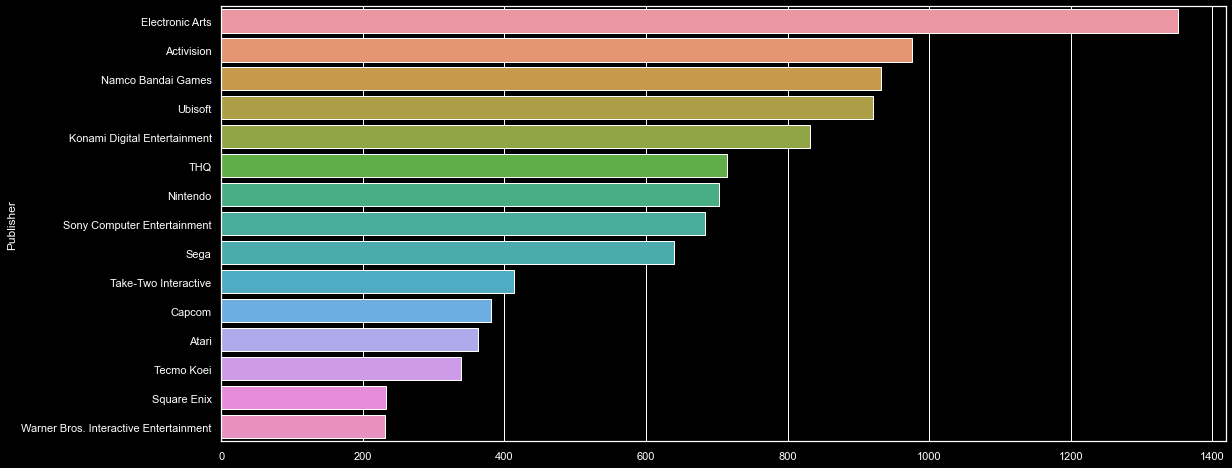

In [ ]:
plt.figure(figsize=(18,8))
pub=games.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(15)
sns.barplot(x=pub.values,y=pub.index)


# Most Popular Platform

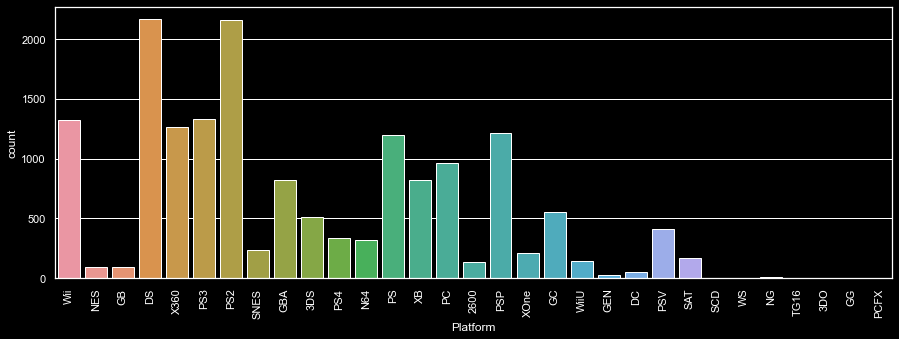

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Platform',data=games,)
plt.xticks(rotation=90)
plt.show()

 # Year in Which Most Game Launched
 

Year Name


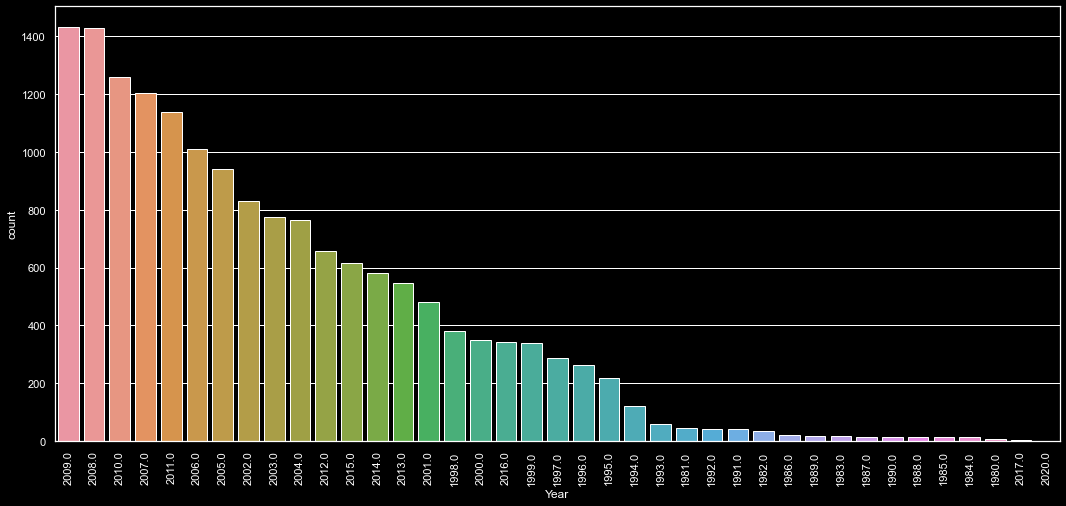

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Year", data=games, order = games.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
print('Year','Name')

# Higest Sale World Wide

In [ ]:
games.sort_values(by=['Global_Sales'], ascending=False)
games = games.groupby(by=['Year'])['Global_Sales'].sum()
games = games.reset_index()

Global_Sales


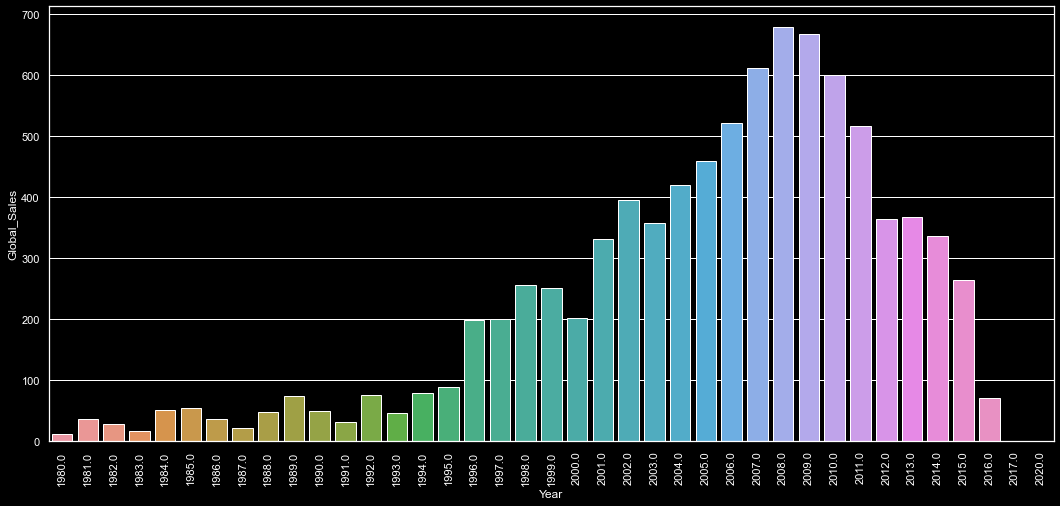

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Year', y='Global_Sales', data=games)
plt.xticks(rotation=90)
print('Global_Sales')

In [ ]:
games.describe()

,Year,Global_Sales
count,39.000000,39.000000
mean,1999.051282,226.163077
std,11.493588,212.350318
min,1980.000000,0.050000
25%,1989.500000,46.600000
50%,1999.000000,199.150000
75%,2008.500000,365.825000
max,2020.000000,678.900000


# Sales compearison by genre

In [733]:
comp_genre =games[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

In [734]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

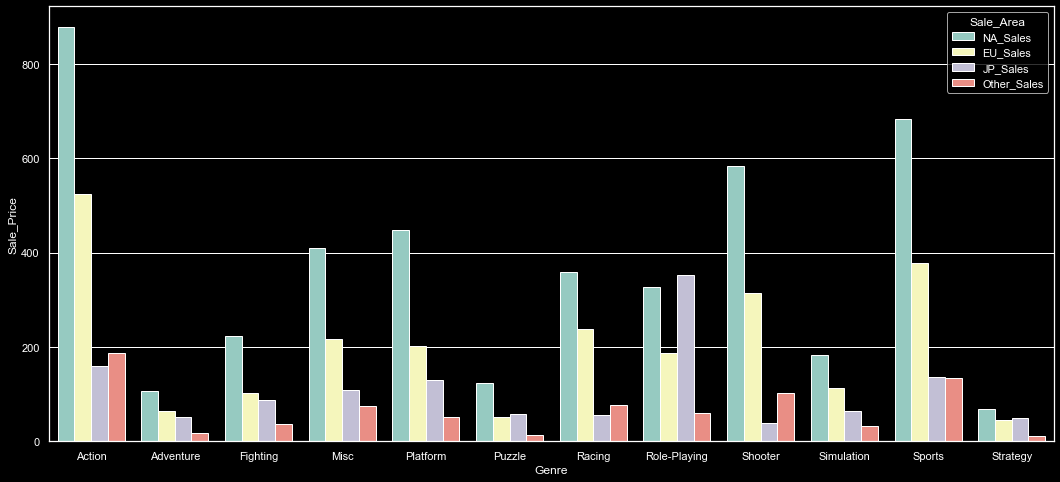

In [737]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

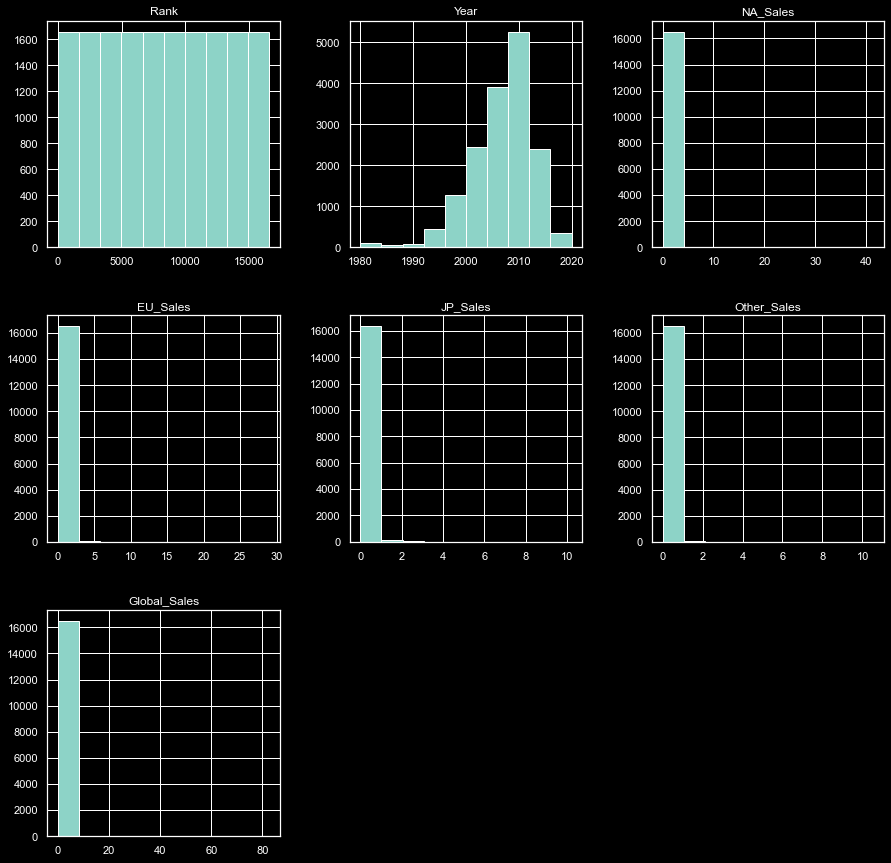

(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [738]:
games.hist(figsize=(15,15))
plt.show()
print(games.shape)
print(games.columns)

In [739]:
top_sale_reg = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


<AxesSubplot:xlabel='region', ylabel='sale'>

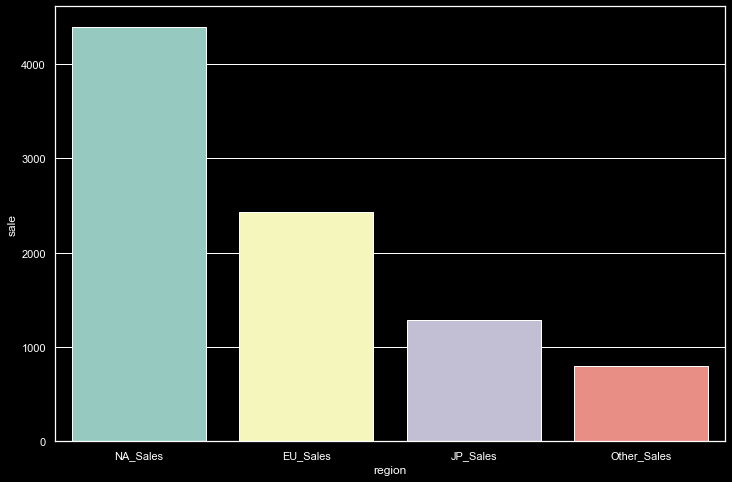

In [743]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [744]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

Sales


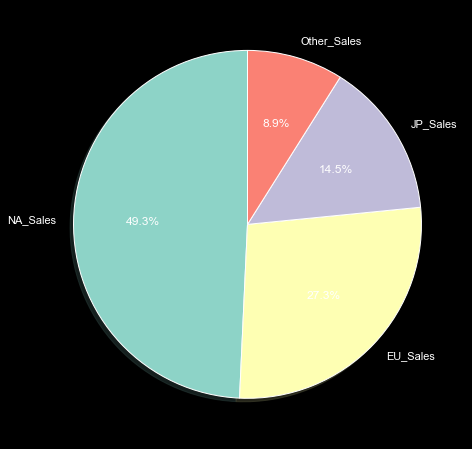

In [746]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
print('Sales')

In [747]:
data_pair = games.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


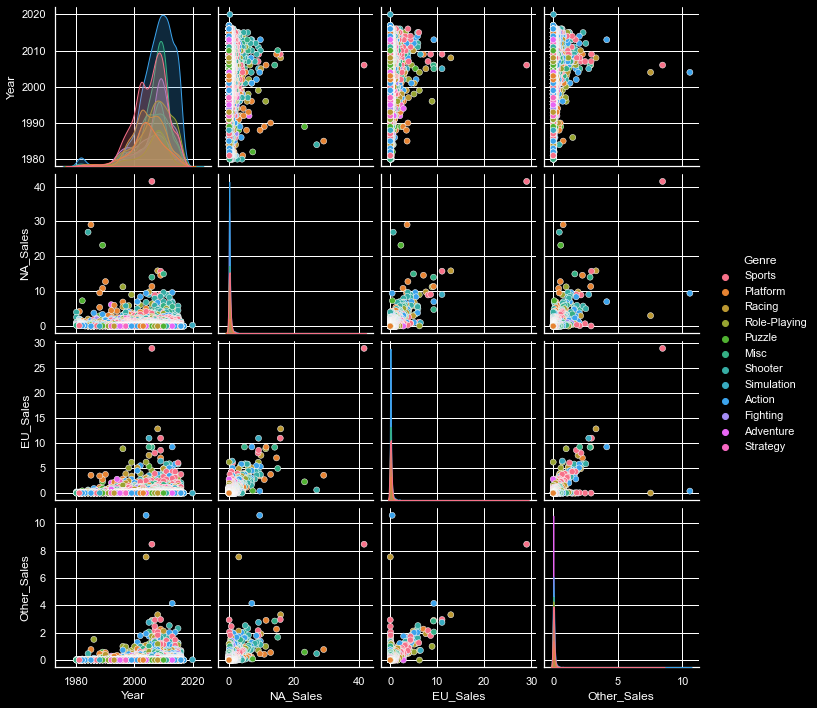

In [748]:
sns.pairplot(data_pair, hue='Genre')